## Importing libraries

In [7]:
import sys
gp = '/home/jupyter-gabriel/'
sys.path.append(gp + "projects/suyana")
from scripts.utils.functions import *

import requests

In [3]:
import os
path = gp + "projects/suyana/data/capacity/"
files = os.listdir(path)
files = [f for f in files if f.endswith(".nc")]

id_canton = [files[i].split("_")[1].split(".")[0] for i in range(len(files))]

IndexError: list index out of range

In [3]:
netcdf_file = xr.open_dataset(path + 'canton_52.nc')

In [9]:
netcdf_file.swc_adjusted.values

array([       nan, 0.34545495,        nan, ..., 0.22011429, 0.19428938,
              nan], shape=(8176,))

In [129]:
list_dates = []
list_swc = []
list_id = []
data = pd.DataFrame()
for file in files:
    id_canton = file.split("_")[1].split(".")[0]
    netcdf_file = xr.open_dataset(path + file)
    
    data_aux = pd.DataFrame({
        "date": netcdf_file.time.values,
        "swc": netcdf_file.swc_adjusted.values
    })
    data_aux["idCanton"] = id_canton

    data = pd.concat([data, data_aux], axis=0)

## Exploratory Data Analysis

In [62]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [140]:
netcdf_file.variables

Frozen({'swc_raw': <xarray.Variable (time: 8176)> Size: 65kB
array([     nan, 0.308279, 0.2454  , ..., 0.320967, 0.319731,      nan],
      shape=(8176,)), 'week': <xarray.Variable (time: 8176)> Size: 65kB
[8176 values with dtype=float64], 'swc_adjusted': <xarray.Variable (time: 8176)> Size: 65kB
array([     nan, 0.350339, 0.269238, ..., 0.320967, 0.319731,      nan],
      shape=(8176,)), 'time': <xarray.IndexVariable 'time' (time: 8176)> Size: 65kB
array(['2002-06-15T00:00:00.000000000', '2002-06-16T00:00:00.000000000',
       '2002-06-17T00:00:00.000000000', ..., '2024-10-29T00:00:00.000000000',
       '2024-10-30T00:00:00.000000000', '2024-10-31T00:00:00.000000000'],
      shape=(8176,), dtype='datetime64[ns]')})

In [64]:
data_summary = data.groupby(["idCanton", "year"]).size().reset_index()

In [65]:
## CANTIDAD DE OBSERVACIONES POR AÑO
data_summary.pivot(index="idCanton", columns="year", values=0)

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
idCanton,,,,,,,,,,,,,,,,,,,,,,,
43,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
45,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
49,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
50,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
51,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
52,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
53,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
54,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
55,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305


In [70]:
## DUPLICADOS
data[data.year==2012].groupby(["date", "idCanton"]).agg(n=("idCanton","count")).reset_index().query('n>1')

,date,idCanton,n
3485,2012-07-24,43,2
3486,2012-07-24,45,2
3487,2012-07-24,49,2
3488,2012-07-24,50,2
3489,2012-07-24,51,2
3490,2012-07-24,52,2
3491,2012-07-24,53,2
3492,2012-07-24,54,2
3493,2012-07-24,55,2
3494,2012-07-24,56,2


In [74]:
n_anios = len(data['year'].unique())
min_year = min(data['year'])
max_year = max(data['year'])
print(f'Cantidad de años: {nAnios} desde {min_year} hasta {max_year}')
n_dates = len(data['date'].unique())
min_date = min(data['date'])
max_date = max(data['date'])
print(f'Cantidad de días: {n_dates} desde {min_date} hasta {max_date}')

Cantidad de años: 23 desde 2002 hasta 2024
Cantidad de días: 8175 desde 2002-06-15 00:00:00 hasta 2024-10-31 00:00:00


## Data from gpkg cantones bolivia

In [13]:
df_cantones = gpd.read_file(gp + 'projects/suyana/data/drought/sub_AOIs_priority.gpkg')

In [14]:
df_cantones.head(4)

,id_canton,ogc_fid,entity,canton_original,provincia,municipio,departamen,area,canton,priority,geometry
0,14,1433,Polyline,Concepcion,Ńuflo de Chavez,Concepcion,Santa Cruz,1077.635625,Concepcion_13,False,"MULTIPOLYGON (((-61.49356 -15.20388, -61.49358..."
1,15,1433,Polyline,Concepcion,Ńuflo de Chavez,Concepcion,Santa Cruz,1173.543180,Concepcion_14,False,"MULTIPOLYGON (((-61.76111 -15.56341, -62.0375 ..."
2,16,1433,Polyline,Concepcion,Ńuflo de Chavez,Concepcion,Santa Cruz,2094.836374,Concepcion_15,False,"MULTIPOLYGON (((-61.56904 -15.56224, -61.5694 ..."
3,17,1433,Polyline,Concepcion,Ńuflo de Chavez,Concepcion,Santa Cruz,2195.671106,Concepcion_16,False,"MULTIPOLYGON (((-62.03581 -15.92269, -62.42771..."


## Data from API for yields panel data

In [15]:
# data_folder = Path("../Data/data_output_rendimiento")
# filename = "df_rendimiento_flagged_ONI.csv"
data_folder = gp + "projects/suyana/data/drought/"
filename = "yields_panel.csv"
df_yields = pd.read_csv(data_folder + filename)
df_yields.drop(['flag','notes', 'Unnamed: 10'], axis=1, inplace = True)

In [16]:
df_yields.head(4)

,producer_id,zone,lot,plot,orig_crop,variety,seedtime,harvest_date,show_furrow,n_plants_m,n_plants_ha,date_beginning_flowering,mature_maturation_date,plant_height,fertitilized,type_of_fertilizer,dose_kg_ha,rend_ton_ha,cond_climaticas_de_la_campana,producer_handling,id_lot,cultivation_id,culture,yr,summer,...,pp_anomaly_seed_date_minus_2_month,vhi_anomaly_seed_date_minus_2_month,ndvi_anomaly_flowering_date,ndpi_anomaly_flowering_date,pp_anomaly_flowering_date,vhi_anomaly_flowering_date,ndvi_flowering_date,ndpi_flowering_date,pp_flowering_date,vhi_flowering_date,ndvi_anomaly_flowering_date_minus_1_month,ndpi_anomaly_flowering_date_minus_1_month,pp_anomaly_flowering_date_minus_1_month,vhi_anomaly_flowering_date_minus_1_month,ndvi_anomaly_flowering_date_minus_2_month,ndpi_anomaly_flowering_date_minus_2_month,pp_anomaly_flowering_date_minus_2_month,vhi_anomaly_flowering_date_minus_2_month,Month,Year,ENSO,pixel_id,anomaly_sum,swc_sum,climatology_sum
0,16,Norte,H-2,Las Londras,Sorgo,Timbo,NaN,2016-09-13,0.45,11.0,244444.440,45,110,1.1,MAP,11-52-0,100,1.000000,NaN,NaN,67,2,SORGO,2016,0,...,-147.570695,-931.913044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,ninia,0.0,0.000000,0.0,0.000000
1,14,Este,B04,Europa,Maiz,Maiz 355,2013-03-10,2013-08-20,0.42,2.4,57142.857,5/14/2013,7/13/2013,2.1,0,0,0,1.994742,NaN,NaN,45,1,MAIZ,2013,0,...,-318.040930,-1266.048243,-573.160520,1.054872,7.770585,-25.339241,6219.065355,1.120897,18.280309,27.384402,-22986.655761,-4.350322,-99.537446,-883.337060,-36100.439166,1.791396,-109.046194,-1606.263388,8.0,2013.0,NaN,0.0,10141.265152,25988.0,15846.734848
2,14,Este,A09,Europa,Sorgo,DAS-5000,2013-03-19,2013-07-24,0.42,9.0,214285.710,5/3/2013,7/7/2013,1.1,0,0,0,2.323631,NaN,NaN,43,2,SORGO,2013,0,...,-252.626529,-1279.054223,1549.200627,0.287106,0.638863,-27.786188,6749.498087,0.222299,9.864622,24.390516,22223.058567,11.863377,107.183678,-914.857636,-14995.596168,0.469207,-157.261620,-1528.424227,7.0,2013.0,NaN,0.0,8117.090909,20801.0,12683.909091
3,12,Este,15-N,AgroOriente,Trigo,A9829R,2013-03-31,2013-08-09,0.17,50.0,2941176.500,5/9/2013,7/13/2013,NaN,0,0,0,NaN,Malo,Regular,27,5,TRIGO,2013,0,...,-503.627799,-390.735870,1530.561548,-0.418810,-6.299874,-9.022686,7196.695431,-0.459921,4.003364,38.563123,7854.427149,4.080776,32.109304,-470.953482,-18272.315065,1.485035,-102.000497,-793.850622,8.0,2013.0,NaN,0.0,8249.757576,20998.0,12748.242424


In [17]:
df_yields.columns

Index(['producer_id', 'zone', 'lot', 'plot', 'orig_crop', 'variety',
       'seedtime', 'harvest_date', 'show_furrow', 'n_plants_m', 'n_plants_ha',
       'date_beginning_flowering', 'mature_maturation_date', 'plant_height',
       'fertitilized', 'type_of_fertilizer', 'dose_kg_ha', 'rend_ton_ha',
       'cond_climaticas_de_la_campana', 'producer_handling', 'id_lot',
       'cultivation_id', 'culture', 'yr', 'summer', 'latitude', 'longitude',
       'flowering_date', 'seed_date', 'diff_date', 'closest_date_index_ndvi',
       'closest_date_index_ndpi', 'closest_date_index_pp',
       'closest_date_index_vhi', 'closest_id_grid', 'ndvi', 'ndpi', 'pp',
       'vhi', 'ndvi_anomaly', 'ndpi_anomaly', 'pp_anomaly', 'vhi_anomaly',
       'ndvi_anomaly_minus_1_month', 'ndpi_anomaly_minus_1_month',
       'pp_anomaly_minus_1_month', 'vhi_anomaly_minus_1_month',
       'ndvi_anomaly_minus_2_month', 'ndpi_anomaly_minus_2_month',
       'pp_anomaly_minus_2_month', 'vhi_anomaly_minus_2_month',
     

In [171]:
list_ids = pd.read_csv(gp + "projects/suyana/data/available_areas.csv")
list_ids = list(list_ids['id_area'])
list_ids.sort()
list_ids[:2]

[43, 45]

In [18]:
df_aux = df_yields[['longitude', 'latitude']].drop_duplicates()
df_aux['coords'] = list(zip(df_aux['longitude'], df_aux['latitude']))

df_coords = gpd.GeoDataFrame({
    'longitude': list(df_aux['longitude']),
    'latitude': list(df_aux['latitude']),
    'geometry': [Point(p) for p in df_aux['coords']]
}, crs = df_cantones.crs)

df_join = df_coords.sjoin(
    df_cantones,
    how = 'left',
    predicate = 'within'
)

In [19]:
df_yields_final = df_yields.merge(
    df_join[['longitude', 'latitude', 'id_canton', 'canton_original', 'provincia', 'municipio', 'departamen']],
    how = 'left',
    on = ['longitude', 'latitude'],
)

In [21]:
df_yields_final.to_csv(gp + 'projects/suyana/data/drought/yields_panel_id.csv', index=False)

In [9]:
df_yields_final = pd.read_csv(gp+'projects/suyana/data/drought/yields_panel_id.csv')

## Clean Raw Data from yields

In [1]:
def remove_duplicates_and_fill(ds):
    ds_unique = ds.drop_duplicates(..., keep='first')
    #df = ds.to_dataframe().reset_index()
    # Eliminar duplicados basados en 'time' para cada combinación única de 'lon' y 'lat'
    #df_unique = df.drop_duplicates(subset=['lon', 'lat', 'time'], keep = 'first')
    #(
    #    df.groupby(["lon", "lat"])
    #    .apply(lambda group: group.drop_duplicates(subset="time", keep="first"))
    #    .reset_index(drop=True)
    #)

    # Convertir de vuelta a xarray Dataset
    #ds_unique = df_unique.set_index(["lon", "lat", "time"]).to_xarray()

    return ds_unique

def clean_data(ds_2002_2011, ds_2012_2024):
    # Remove Duplicates
    ds_2002_2011 = remove_duplicates_and_fill(ds_2002_2011)
    ds_2012_2024 = remove_duplicates_and_fill(ds_2012_2024)

    # Concat
    ds = xr.concat(
        [
            ds_2002_2011,
            ds_2012_2024,
        ],
        dim="time",
    )

    ds["time"] = pd.to_datetime(ds["time"].values)

    ds = ds.reindex(
        time=pd.date_range(
            start=ds["time"].min().values, end=ds["time"].max().values, freq="D"
        )
    )

    # Fill Nans
    ds = ds.where(ds != 65535, np.nan)

    # Average all pixels
    #ds = ds.mean(dim=["lat", "lon"])
    
    # Remove data from 2024-2025 campaign
    ds = ds.sel(time=slice(None, "2024-10-31"))

    return ds

In [2]:
def empirical_cdf_matching(df_fix, df_orig, group_cols, field):
    """
    Performs empirical CDF matching, handling NaN values.

    Args:
      x: The data to be adjusted.
      y: The reference data.

    Returns:
      The adjusted data.
    """

    df_base = df_orig.copy()
    df_base['index'] = df_base.groupby(group_cols)[field].rank(method="first")
    df_base = df_base.dropna(subset=[field],axis=0)

    df_base_size = df_base.groupby(group_cols).agg(
        size=(field, 'count')
    ).reset_index()

    df_base = df_base.rename({field: field+'_adjusted'}, axis=1)
    
    df_fix['rank'] = (
        df_fix.groupby(group_cols)[field].rank(method="max")
        / df_fix.groupby(group_cols)[field].transform('count')
    )
    
    df_fix = df_fix.merge(
        df_base_size,
        how = 'left',
        on = group_cols
    )

    df_fix['index'] = np.floor(df_fix['rank']*df_fix['size'])
    
    df_fix = df_fix.merge(
        df_base[group_cols +['index', field+'_adjusted']],
        how = 'left',
        on = group_cols + ['index']
    ).drop(labels=['index', 'size', 'rank'], axis=1)

    return df_fix

    
def cdf_matching_with_spatial_groupby(ds):
    # Define the periods
    period1_end = "2011-10-03"
    period2_start = "2012-07-24"

    # Create a week coordinate attached to the existing time dimension
    ds = ds.assign_coords(
        week = ("time", ds["time"].dt.isocalendar().week.values)
    )

    # Split the dataset into two periods
    ds_period1 = ds.sel(time=slice(None, period1_end))
    ds_period2 = ds.sel(time=slice(period2_start, None))

    df_fix = ds_period1.to_dataframe().reset_index()
    df_base = ds_period2.to_dataframe().reset_index()
    
    df_fix = empirical_cdf_matching(
        df_fix, df_base, ['lon','lat', 'week'], 'swc'
    )

    df_base['swc_adjusted'] = df_base['swc'] 

    #df_total = pd.concat([df_fix, df_base], axis=0)

    # Create an xarray Dataset
    ds_period1 = df_fix.set_index(['lon', 'lat', 'time']).to_xarray()
    ds_period1 = ds_period1.set_coords('week')

    ds_period2 = df_base.set_index(['lon', 'lat', 'time']).to_xarray()
    ds_period2 = ds_period2.set_coords('week')

    return ds_period1, ds_period2

In [3]:
def fill_empty_window(ds_period1, ds_period2):
    # Define the empty time window
    empty_window_start = "2011-10-04"
    empty_window_end = "2012-07-24"

    # Create a temporary dataframe from which to sample
    df_dist = ds_period2.to_dataframe().reset_index()

    # Create a time range for the empty window
    empty_time_range = pd.date_range(empty_window_start, empty_window_end, freq="D")
    lon_range = sorted(df_dist['lon'].unique())
    lat_range = sorted(df_dist['lat'].unique())

    empty_grid = pd.MultiIndex.from_product(
        [lon_range, lat_range, empty_time_range],
        names = ["lon", "lat", "time"]
    ).to_frame(index=False)

    empty_grid['week'] = empty_grid['time'].dt.isocalendar().week

    empty_grid_size = empty_grid.groupby(['lon', 'lat', 'week']).agg(
        size = ("time", "count")
    ).reset_index()

    df_base = df_dist.merge(
        empty_grid_size,
        how = "left",
        on = ['lon', 'lat', 'week']
    )
    
    df_base['size'] = (df_base['size'].fillna(0)).astype(int)
    
    df_base = df_base.groupby(['lon', 'lat', 'week']).apply(
        lambda x: x.sample(
            n=min(len(x), x['size'].iloc[0])  # Ensure not to oversample
        )
    ).reset_index(drop=True)
    
    df_base = df_base[['lon', 'lat', 'week','swc','swc_adjusted']]
    
    df_base['day_index'] = df_base.groupby(['lon', 'lat', 'week']).cumcount()
    # Add a day index to the empty grid
    empty_grid['day_index'] = empty_grid.groupby(['lon', 'lat', 'week']).cumcount()
    
    # Step 5: Merge the expanded sampled data with the empty grid
    empty_grid = empty_grid.merge(
        df_base,
        how = "left",
        on = ['lon', 'lat', 'week', 'day_index']
    ).drop(['day_index'], axis=1)

    ds_empty = empty_grid.set_index(['lon', 'lat', 'time']).to_xarray()
    ds_empty = ds_empty.set_coords('week')
    
    # Concatenate the generated data with the adjusted period 1 and period 2 data
    ds_adjusted = xr.concat(
        [ds_period1, ds_empty, ds_period2], dim="time"
    ).sortby("time")

    ds_adjusted = ds_adjusted.rename({"swc": "swc_raw"})

    return ds_adjusted

In [4]:
def fill_empty_window_w_data(ds_period1, ds_period2, ds_orig):
    # Define the empty time window
    empty_window_start = "2011-10-04"
    empty_window_end = "2012-07-24"

    ds_base = ds_orig.sel(time = slice(empty_window_start, empty_window_end))


    ds_fill = ds_base.sel(
        lat = ds_period2.lat, lon = ds_period2.lon, method = 'nearest'
    )
    ds_fill = ds_fill.assign_coords(
        lat = ds_period2.lat, 
        lon = ds_period2.lon, 
        time = ds_fill.time.dt.round('d'),
        week = ('time', ds_fill.time.dt.isocalendar().week.values)
    )

    df_fix = ds_fill.to_dataframe().reset_index()
    df_base = ds_period2.to_dataframe().reset_index().drop(['swc_adjusted'], axis=1)

    df_fix = empirical_cdf_matching(df_fix, df_base, ['lon', 'lat', 'week'], 'swc')

    ds_empty = df_fix.set_index(['lon', 'lat', 'time']).to_xarray()
    ds_empty = ds_empty.set_coords('week')
    
    # Concatenate the generated data with the adjusted period 1 and period 2 data
    ds_adjusted = xr.concat(
        [ds_period1, ds_empty, ds_period2], dim="time"
    ).sortby("time")

    ds_adjusted = ds_adjusted.rename({"swc": "swc_raw"})

    return ds_adjusted

# Interpolate empty window with ERA 5 dataset

In [5]:
ds_era2011 = xr.open_dataset(gp + 'projects/suyana/data/capacity/soilwater2011.nc')
ds_era2012 = xr.open_dataset(gp + 'projects/suyana/data/capacity/soilwater2012.nc')
ds_era = xr.concat([ds_era2011, ds_era2012], dim='valid_time')
ds_era = ds_era.rename({
    'valid_time': 'time',
    'longitude': 'lon',
    'latitude': 'lat',
    'swvl1': 'swc'
}).drop_vars(['number', 'expver'])
ds_era

NameError: name 'xr' is not defined

In [ ]:
ds_era.to_netcdf(gp + 'projects/suyana/data/capacity/soilwater.nc')

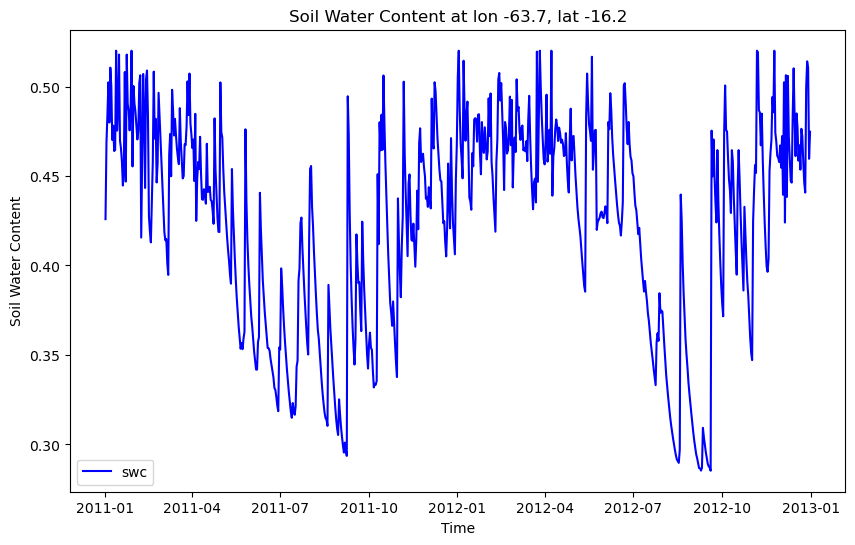

In [75]:
# Select the specific lon and lat by label (or by position) 
lon_label = -63.7
lat_label = -16.2 
# Select the data at the specific location 
ds_location = ds_era.sel(lon=lon_label, lat=lat_label, method='nearest') 
# Plotting 
plt.figure(figsize=(10, 6)) 
plt.plot(ds_location.time, ds_location.swc, label='swc', color='blue') 
plt.xlabel('Time') 
plt.ylabel('Soil Water Content') 
plt.title(f'Soil Water Content at lon {lon_label}, lat {lat_label}') 
plt.legend() 
plt.show()

In [77]:
lat_fine = np.arange(ds_era.lat.min(), ds_era.lat.max() + 0.01, 0.01)
lon_fine = np.arange(ds_era.lon.min(), ds_era.lon.max() + 0.01, 0.01)
# Interpolate to the finer resolution
ds_interp = ds_era.interp(lat=lat_fine, lon=lon_fine, method="linear")

# Inspect the interpolated data
print(ds_interp)

<xarray.Dataset> Size: 178MB
Dimensions:  (time: 731, lat: 151, lon: 201)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2011-01-01T08:00:00 ... 2012-12-31T08:...
  * lat      (lat) float64 1kB -17.5 -17.49 -17.48 ... -16.02 -16.01 -16.0
  * lon      (lon) float64 2kB -63.5 -63.49 -63.48 ... -61.52 -61.51 -61.5
Data variables:
    swc      (time, lat, lon) float64 177MB 0.4034 0.4021 0.4008 ... nan nan nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-20T01:35 GRIB to CDM+CF via cfgrib-0.9.1...


In [72]:
ds_fill = ds_era.sel(
    lat = ds_period2.lat, lon = ds_period2.lon, method = 'nearest'
)
ds_fill = ds_fill.assign_coords(
    lat = ds_period2.lat, 
    lon = ds_period2.lon, 
    time = ds_fill.time.dt.round('d'),
    week = ('time', ds_fill.time.dt.isocalendar().week.values)
)
ds_fill

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 731, lat: 39, lon: 61)
Coordinates:
  * lat      (lat) float64 312B -17.18 -17.17 -17.16 ... -16.85 -16.84 -16.83
  * lon      (lon) float64 488B -62.87 -62.86 -62.85 ... -62.35 -62.34 -62.33
  * time     (time) datetime64[ns] 6kB 2011-01-01 2011-01-02 ... 2012-12-31
    week     (time) int64 6kB 52 52 1 1 1 1 1 1 1 ... 51 52 52 52 52 52 52 52 1
Data variables:
    swc      (time, lat, lon) float32 7MB 0.4838 0.4838 0.4838 ... 0.4841 0.4841
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-20T01:35 GRIB to CDM+CF via cfgrib-0.9.1...

In [90]:
ds_final = fill_empty_window_w_data(ds_period1, ds_period2, ds_era)

In [91]:
ds_final

<xarray.Dataset> Size: 337MB
Dimensions:       (lon: 49, lat: 35, time: 8176)
Coordinates:
    week          (lon, lat, time) int64 112MB 24 24 25 25 25 ... 43 44 44 44 44
  * lon           (lon) float64 392B -62.75 -62.74 -62.73 ... -62.33 -62.32
  * lat           (lat) float64 280B -17.11 -17.1 -17.09 ... -16.82 -16.81
  * time          (time) datetime64[ns] 65kB 2002-06-15 ... 2024-10-31
Data variables:
    swc_raw       (lon, lat, time) float64 112MB nan nan nan nan ... nan nan nan
    swc_adjusted  (lon, lat, time) float64 112MB nan nan nan nan ... nan nan nan

# Pipeline to do all the cleaning and preprocessing steps

In [10]:
import os
path = gp+"/suyana/drought/swc/raw/"
files = os.listdir(path)
files = [f for f in files if f.startswith("canton")]
id_canton = [files[i].split("_")[1] for i in range(len(files))]

list_ids = list(set(df_yields_final['id_canton'].astype(str)).intersection(set(id_canton)))

In [11]:
print(sorted(list_ids))
print(sorted(df_yields_final['id_canton'].astype(str).unique()))

['189', '195', '209', '43', '49', '52', '54', '56', '57']
['189', '195', '209', '43', '49', '52', '54', '56', '57']


In [80]:
for id in ['43', '49', '52', '54', '56', '57', '189', '195', '209']:
    print(f"Canton: {id}")
    local_path = path + 'canton_' + str(id) + '/'
    files = sorted(os.listdir(local_path))
    for i in range(len(files)):
        if i==0:
            netcdf_ini = xr.open_dataset(local_path + files[i])
        if i > 0:
            netcdf_aux = xr.open_dataset(local_path + files[i])
            #netcdf_ini = xr.concat([netcdf_ini, netcdf_aux], dim='time')
    netcdf_total = clean_data(netcdf_ini, netcdf_aux)
    print(f"Cleaning done")
    ds_period1, ds_period2 = cdf_matching_with_spatial_groupby(netcdf_total)
    print(f"CDF matching done")
    ds_final = fill_empty_window_w_data(ds_period1, ds_period2, ds_era)
    print(f"Filling empty window done")


    comp = dict(zlib=True, complevel=9)
    encoding = {var: comp for var in ds_final.data_vars}
    
    ds_final.to_netcdf(
        gp + '/projects/suyana/data/capacity/canton_processed_' + str(id) +'.nc',
        encoding = encoding
    )

Canton: 43
Cleaning done
CDF matching done
Filling empty window done
Canton: 49
Cleaning done
CDF matching done
Filling empty window done
Canton: 52
Cleaning done
CDF matching done
Filling empty window done
Canton: 54
Cleaning done
CDF matching done
Filling empty window done
Canton: 56
Cleaning done
CDF matching done
Filling empty window done
Canton: 57
Cleaning done
CDF matching done
Filling empty window done
Canton: 189
Cleaning done
CDF matching done
Filling empty window done
Canton: 195
Cleaning done
CDF matching done
Filling empty window done
Canton: 209
Cleaning done
CDF matching done
Filling empty window done


In [19]:
ds_final = fill_empty_window(ds_period1, ds_period2)

<xarray.Dataset> Size: 305MB
Dimensions:       (lon: 59, lat: 36, time: 4483)
Coordinates:
    week          (lon, lat, time) int64 76MB 30 30 30 30 30 ... 43 44 44 44 44
  * lon           (lon) float64 472B -63.7 -63.69 -63.68 ... -63.18 -63.18
  * lat           (lat) float64 288B -16.51 -16.5 -16.49 ... -16.21 -16.2 -16.19
  * time          (time) datetime64[ns] 36kB 2012-07-24 ... 2024-10-31
Data variables:
    swc           (lon, lat, time) float64 76MB nan nan nan ... 0.263 0.25 nan
    index         (lon, lat, time) float64 76MB nan nan nan ... 37.0 30.0 nan
    swc_adjusted  (lon, lat, time) float64 76MB nan nan nan ... 0.263 0.25 nan

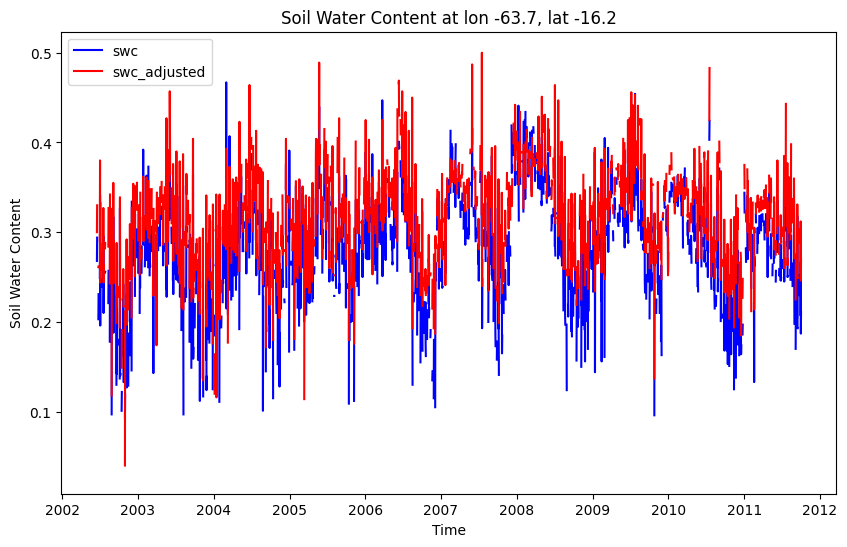

In [32]:
# Select the specific lon and lat by label (or by position) 
lon_label = -63.7
lat_label = -16.2 
# Select the data at the specific location 
ds_location = ds_period1.sel(lon=lon_label, lat=lat_label, method='nearest') 
# Plotting 
plt.figure(figsize=(10, 6)) 
plt.plot(ds_location.time, ds_location.swc, label='swc', color='blue') 
plt.plot(ds_location.time, ds_location.swc_adjusted, label='swc_adjusted', color='red') 
plt.xlabel('Time') 
plt.ylabel('Soil Water Content') 
plt.title(f'Soil Water Content at lon {lon_label}, lat {lat_label}') 
plt.legend() 
plt.show()

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))
sns.lineplot(ds[(abs(df_ini['lon']+63.698198)<0.002) & (abs(df_ini['lat']+16.193694)<0.002)],x='time', y='swc_x')
sns.lineplot(df_ini[(abs(df_ini['lon']+63.698198)<0.002) & (abs(df_ini['lat']+16.193694)<0.002)],x='time', y='swc_y', color = "red")

# Apply coarsen to nearest pixels

In [2]:
def coarsen_ds(ds, params_coarse):
    ds_new = ds.coarsen(params_coarse, boundary = 'pad').mean()
    return ds_new

In [3]:
params_coarse = {
    'lon': 4,
    'lat': 4,
}

In [ ]:
for id in ['43', '49', '52', '54', '56', '57', '189', '195', '209']:
    print(f"Canton: {id}")
    
    netcdf_ini = xr.open_dataset(gp + '/projects/suyana/data/capacity/canton_processed_' + str(id) +'.nc')
    netcdf_fin = coarsen_ds(netcdf_ini, params_coarse)

    comp = dict(zlib=True, complevel=9)
    encoding = {var: comp for var in netcdf_fin.data_vars}
    netcdf_fin.to_netcdf(
        gp + '/projects/suyana/data/capacity/canton_coarsened_' + str(id) +'.nc',
        encoding = encoding
    )

Canton: 209


/opt/tljh/user/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3548: SerializationWarning: saving variable week with floating point data as an integer dtype without any _FillValue to use for NaNs
  exec(code_obj, self.user_global_ns, self.user_ns)


# Create climatology and anomaly from nearest pixel

In [6]:
df_coords = df_yields_final[['longitude', 'latitude','id_lot', 'id_canton']].drop_duplicates(
    subset=['longitude', 'latitude', 'id_canton'], keep='first'
)
list_ids = sorted(df_coords['id_canton'].unique().tolist())
list_ids

[43, 49, 52, 54, 56, 57, 189, 195, 209]

In [7]:
# Step 1: Function to select nearest points
def select_nearest(ds, df):
    """
    Selects nearest points from the xarray.Dataset for each (lon, lat) in the DataFrame.
    """
    results = []
    for _, row in df.iterrows():
        # Select the nearest point
        nearest_point = ds.sel(lon=row["longitude"], lat=row["latitude"], method="nearest")
        results.append(nearest_point)
    return results

df = pd.DataFrame()
for id in list_ids:
    print(f"Canton: {id}")
    df_aux = df_coords[df_coords['id_canton']==id].copy()
    ds_canton = xr.open_dataset(gp + '/projects/suyana/data/capacity/canton_coarsened_' + str(id) +'.nc')
    ds_nearest = select_nearest(ds_canton, df_aux)
    df_result = pd.DataFrame({
        "id_lot": df_aux["id_lot"],
        "lon": df_aux["longitude"],
        "lat": df_aux["latitude"],
        "id_canton": df_aux["id_canton"],
        "nearest_lon": [point.lon.values for point in ds_nearest],
        "nearest_lat": [point.lat.values for point in ds_nearest],
        "time": [point.time.values for point in ds_nearest],
        "swc_raw": [point.swc_raw.values for point in ds_nearest],
        "swc_adjusted": [point.swc_adjusted.values for point in ds_nearest],
    })
    df_result = df_result.explode(['time', 'swc_raw', 'swc_adjusted'], ignore_index= True)
    df = pd.concat([df, df_result], axis=0)

Canton: 43
Canton: 49
Canton: 52
Canton: 54
Canton: 56
Canton: 57
Canton: 189
Canton: 195
Canton: 209


In [8]:
df_final = df.copy()

In [9]:
df_final['year'] =  df_final['time'].dt.year
df_final['month'] =  df_final['time'].dt.month
df_final['day'] = df_final['time'].dt.dayofyear
df_final['swc_raw'] =  df_final['swc_raw'].astype(float)
df_final['swc_adjusted'] =  df_final['swc_adjusted'].astype(float)
df_final.head(4)

,id_lot,lon,lat,id_canton,nearest_lon,nearest_lat,time,swc_raw,swc_adjusted,year,month,day
0,51,-61.93275,-17.08809,43,-61.94594594595276,-17.081081081082964,2002-06-15,NaN,NaN,2002,6,166
1,51,-61.93275,-17.08809,43,-61.94594594595276,-17.081081081082964,2002-06-16,0.299000,0.306812,2002,6,167
2,51,-61.93275,-17.08809,43,-61.94594594595276,-17.081081081082964,2002-06-17,NaN,NaN,2002,6,168
3,51,-61.93275,-17.08809,43,-61.94594594595276,-17.081081081082964,2002-06-18,0.290625,0.318062,2002,6,169


In [18]:
df_aux = df_final[(df_final['time']>='2003-01-01') & (df_final['time']<'2024-01-01')].copy()
df_climatology = df_aux.groupby(['lon','lat','id_lot','day']).agg(
    climatology = ('swc_adjusted', 'mean')
).reset_index()
df_climatology

,lon,lat,id_lot,day,climatology
0,-63.48737,-16.36514,69,1,0.343196
1,-63.48737,-16.36514,69,2,0.349536
2,-63.48737,-16.36514,69,3,0.341375
3,-63.48737,-16.36514,69,4,0.358075
4,-63.48737,-16.36514,69,5,0.359125
...,...,...,...,...,...
39157,-61.93275,-17.08809,51,362,0.239117
39158,-61.93275,-17.08809,51,363,0.240183
39159,-61.93275,-17.08809,51,364,0.230793
39160,-61.93275,-17.08809,51,365,0.232559


In [11]:
df_final = df_final.merge(
    df_climatology.drop(['id_lot'], axis=1),
    how = 'left',
    on = ['lon', 'lat', 'day']
)
df_final.head(4)

,id_lot,lon,lat,id_canton,nearest_lon,nearest_lat,time,swc_raw,swc_adjusted,year,month,day,climatology
0,51,-61.93275,-17.08809,43,-61.94594594595276,-17.081081081082964,2002-06-15,NaN,NaN,2002,6,166,0.292125
1,51,-61.93275,-17.08809,43,-61.94594594595276,-17.081081081082964,2002-06-16,0.299000,0.306812,2002,6,167,0.267078
2,51,-61.93275,-17.08809,43,-61.94594594595276,-17.081081081082964,2002-06-17,NaN,NaN,2002,6,168,0.265296
3,51,-61.93275,-17.08809,43,-61.94594594595276,-17.081081081082964,2002-06-18,0.290625,0.318062,2002,6,169,0.249428


In [12]:
df_final['anomaly'] = df_final['swc_adjusted'] - df_final['climatology']
df_final['negativeAnomaly'] = np.where(df_final['anomaly']<0, abs(df_final['anomaly']), 0)

In [131]:
df_final['cropYear'] = (df_final['time'] - pd.DateOffset(months=4)).dt.year
df_final['cropCycle'] = np.where(
    #(df_final['month'].isin([11,12,1])) | ((df_final['month']==2) & (df_final['day']<=15)),
    ~(df_final['month'].isin([13])),
    df_final['cropYear'].astype(str),
    df_final['year'].astype(str) + '_'
)

In [132]:
df_final['flagSummer'] = np.where(df_final['month'].isin([11,12,1,2,3,4]), 1, 0)

In [133]:

df_final.head(4)

,id_lot,lon,lat,id_canton,nearest_lon,nearest_lat,time,swc_raw,swc_adjusted,year,month,day,climatology,anomaly,negativeAnomaly,cropYear,cropCycle,flagSummer
0,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-06-15,NaN,NaN,2002,6,166,0.293538,NaN,0.0,2002,2002,0
1,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-06-16,0.301,0.309,2002,6,167,0.268583,0.040417,0.0,2002,2002,0
2,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-06-17,NaN,NaN,2002,6,168,0.267067,NaN,0.0,2002,2002,0
3,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-06-18,0.294,0.320,2002,6,169,0.251231,0.068769,0.0,2002,2002,0


In [134]:
df_final['accumulatedAnomaly'] = df_final.groupby(['lon', 'lat', 'cropCycle', 'flagSummer'])['negativeAnomaly'].cumsum()
df_final.iloc[135:150,:]

,id_lot,lon,lat,id_canton,nearest_lon,nearest_lat,time,swc_raw,swc_adjusted,year,month,day,climatology,anomaly,negativeAnomaly,cropYear,cropCycle,flagSummer,accumulatedAnomaly
135,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-10-28,NaN,NaN,2002,10,301,0.234187,NaN,0.000000,2002,2002,0,1.861261
136,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-10-29,0.189,0.228,2002,10,302,0.253667,-0.025667,0.025667,2002,2002,0,1.886927
137,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-10-30,NaN,NaN,2002,10,303,0.237308,NaN,0.000000,2002,2002,0,1.886927
138,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-10-31,0.148,0.195,2002,10,304,0.216615,-0.021615,0.021615,2002,2002,0,1.908543
139,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-11-01,NaN,NaN,2002,11,305,0.223615,NaN,0.000000,2002,2002,1,0.000000
140,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-11-02,0.160,0.205,2002,11,306,0.219308,-0.014308,0.014308,2002,2002,1,0.014308
141,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-11-03,0.169,0.214,2002,11,307,0.220000,-0.006000,0.006000,2002,2002,1,0.020308
142,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-11-04,NaN,NaN,2002,11,308,0.229154,NaN,0.000000,2002,2002,1,0.020308
143,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-11-05,0.225,0.288,2002,11,309,0.264643,0.023357,0.000000,2002,2002,1,0.020308
144,51,-61.93275,-17.08809,43,-61.93243243243924,-17.085585585587467,2002-11-06,NaN,NaN,2002,11,310,0.242538,NaN,0.000000,2002,2002,1,0.020308


In [19]:
ds_canton = xr.open_dataset(gp + '/projects/suyana/data/capacity/canton_coarsened_' + str(43) +'.nc')
df_aux = ds_canton.to_dataframe().reset_index()
df_aux['day'] = df_aux['time'].dt.dayofyear
df_climatology = df_aux.groupby(['day']).agg(
    climatology = ('swc_adjusted', 'mean')
).reset_index()
df_climatology

,day,climatology
0,1,0.232577
1,2,0.236169
2,3,0.239592
3,4,0.245513
4,5,0.256663
...,...,...
361,362,0.232230
362,363,0.229809
363,364,0.220560
364,365,0.224467


<Axes: xlabel='day', ylabel='climatology'>

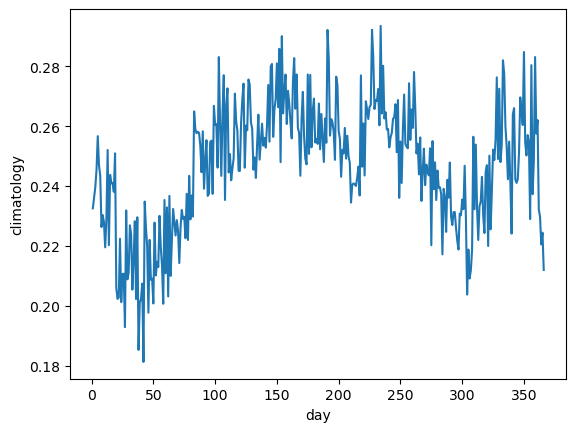

In [20]:
sns.lineplot(data=df_climatology, x='day', y='climatology')

In [47]:
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 60.9 MB/s eta 0:00:0000:0100:01


In [51]:
df_final['nearest_lat'] = df_final['nearest_lat'].astype(float)
df_final['nearest_lon'] = df_final['nearest_lon'].astype(float)

In [136]:
df_final.to_parquet(gp + '/projects/suyana/data/drought/anomalies.parquet', compression='gzip', index=False)

ArrowInvalid: ('Can only convert 1-dimensional array values', 'Conversion failed for column nearest_lon with type object')

In [4]:
df_final = pd.read_parquet(gp + '/projects/suyana/data/drought/anomalies.parquet')
df_final.head(4)

,id_lot,lon,lat,id_canton,nearest_lon,nearest_lat,time,swc_raw,swc_adjusted,year,month,day,climatology,anomaly,negativeAnomaly,cropYear,cropCycle,flagSummer,accumulatedAnomaly
0,51,-61.93275,-17.08809,43,-61.932432,-17.085586,2002-06-15,NaN,NaN,2002,6,166,0.293538,NaN,0.0,2002,2002,0,0.0
1,51,-61.93275,-17.08809,43,-61.932432,-17.085586,2002-06-16,0.301,0.309,2002,6,167,0.268583,0.040417,0.0,2002,2002,0,0.0
2,51,-61.93275,-17.08809,43,-61.932432,-17.085586,2002-06-17,NaN,NaN,2002,6,168,0.267067,NaN,0.0,2002,2002,0,0.0
3,51,-61.93275,-17.08809,43,-61.932432,-17.085586,2002-06-18,0.294,0.320,2002,6,169,0.251231,0.068769,0.0,2002,2002,0,0.0


In [135]:
df_final.to_csv(gp + '/projects/suyana/data/drought/anomalies.csv', index=False)

# Final yields_panel data

In [138]:
df_yields_final = df_yields_final.loc[~(df_yields_final.seed_date.isna()),:].copy()

In [140]:
df_yields_final['harvest_date'] = pd.to_datetime(df_yields_final['harvest_date'])
df_yields_final['seed_date'] = pd.to_datetime(df_yields_final['seed_date'])
df_yields_final['flowering_date'] = pd.to_datetime(df_yields_final['flowering_date'])

In [150]:
df_yields_final.groupby([df_yields_final.seed_date.dt.month, df_yields_final.harvest_date.dt.month]).agg(n = ('id_lot', 'count')).reset_index().tail(20)

,seed_date,harvest_date,n
25,8,8.0,1
26,8,10.0,1
27,8,11.0,9
28,8,12.0,10
29,9,1.0,1
30,9,11.0,1
31,11,1.0,1
32,11,2.0,7
33,11,3.0,129
34,11,4.0,39


In [144]:
df_yields_final['cropYear'] = (df_yields_final.seed_date - pd.DateOffset(months=3)).dt.year
df_yields_final['cropCycle'] = np.where(
    #(df_final['month'].isin([11,12,1])) | ((df_final['month']==2) & (df_final['day']<=15)),
    ~(df_yields_final.seed_date.dt.month.isin([13])),
    df_yields_final['cropYear'].astype(str),
    df_yields_final.seed_date.dt.year.astype(str) + '_'
)
df_yields_final['flagSummer'] = np.where(df_yields_final.seed_date.dt.month.isin([11,12,1,2,3,4]), 1, 0)

In [145]:
df_yields_final.cropCycle.value_counts()

cropCycle
2014    167
2015    157
2016    154
2017    131
2013     75
2018     32
2012      3
Name: count, dtype: int64

In [68]:
df_yields_final.harvest_date.dt.month.value_counts()

harvest_date
3.0     168
8.0     156
4.0     145
9.0      67
11.0     60
10.0     39
7.0      35
12.0     16
6.0      12
2.0       7
1.0       3
5.0       2
Name: count, dtype: int64

In [146]:
# Get the nearest anomaly crop cycle
df_anomalies = df_final.groupby(['lon', 'lat', 'cropCycle', 'flagSummer']).agg(
    accumulatedAnomaly = ('accumulatedAnomaly', 'max'),
    #accumulatedAnomaly_2 = ('negativeAnomaly', 'sum'),
).reset_index()
df_anomalies

,lon,lat,cropCycle,flagSummer,accumulatedAnomaly
0,-63.48737,-16.36514,2002,0,3.480032
1,-63.48737,-16.36514,2002,1,1.623479
2,-63.48737,-16.36514,2003,0,3.350986
3,-63.48737,-16.36514,2003,1,4.073963
4,-63.48737,-16.36514,2004,0,1.572667
...,...,...,...,...,...
4810,-61.93275,-17.08809,2022,0,3.254927
4811,-61.93275,-17.08809,2022,1,2.154343
4812,-61.93275,-17.08809,2023,0,1.942862
4813,-61.93275,-17.08809,2023,1,2.579326


In [147]:
df_yields_join = df_yields_final.merge(
    df_anomalies,
    how = 'left',
    left_on = ['longitude', 'latitude', 'cropCycle', 'flagSummer'],
    right_on = ['lon', 'lat', 'cropCycle', 'flagSummer']
).drop(['lon', 'lat'], axis=1)
df_yields_join[['longitude', 'latitude', 'cropCycle', 'flagSummer', 'accumulatedAnomaly']].head(10)

,longitude,latitude,cropCycle,flagSummer,accumulatedAnomaly
0,-63.48191,-16.36096,2016,0,5.631754
1,-62.35004,-17.05833,2012,1,2.179553
2,-62.33751,-17.07043,2012,1,2.192454
3,-62.40913,-16.92304,2012,1,1.708325
4,-62.40973,-16.92482,2013,1,1.366242
5,-62.34688,-17.09826,2013,1,1.964897
6,-62.36080,-17.08261,2013,1,1.892275
7,-62.28137,-17.30583,2013,1,2.883126
8,-62.41933,-16.92666,2013,1,1.343708
9,-62.41945,-16.92877,2013,1,1.345889


In [148]:
df_yields_join.to_csv(gp + 'projects/suyana/data/drought/yields_panel_final.csv', index=False)
#df_yields_join

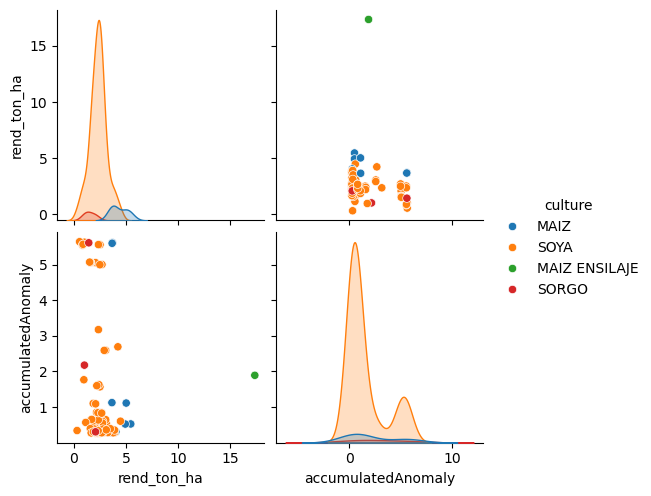

In [149]:
sns.pairplot(
    df_yields_join.loc[df_yields_join['harvest_date'].dt.month.isin([11,12,1,2]),['rend_ton_ha', 'accumulatedAnomaly','culture']], 
    hue='culture'
)

In [ ]:
df_yields_final['seedtime'] = pd.to_datetime(df_yields_final['seedtime'])
df_yields_final.loc[df_yields_final.summer==1,'seedtime'].dt.month.unique()

In [ ]:
df_yields_final.loc[df_yields_final.summer==0,'seedtime'].dt.month.unique()

In [ ]:
df_yields_final.summer.value_counts()

# Final yields data version 2

In [3]:
df_yields_final = df_yields_final.loc[~(df_yields_final.seed_date.isna()),:].copy()

df_yields_final['harvest_date'] = pd.to_datetime(df_yields_final['harvest_date'])
df_yields_final['seed_date'] = pd.to_datetime(df_yields_final['seed_date'])
df_yields_final['flowering_date'] = pd.to_datetime(df_yields_final['flowering_date'])

In [5]:
df_final.columns

Index(['id_lot', 'lon', 'lat', 'id_canton', 'nearest_lon', 'nearest_lat',
       'time', 'swc_raw', 'swc_adjusted', 'year', 'month', 'day',
       'climatology', 'anomaly', 'negativeAnomaly', 'cropYear', 'cropCycle',
       'flagSummer', 'accumulatedAnomaly'],
      dtype='object')

In [9]:
df_aux = df_yields_final[['longitude','latitude', 'harvest_date', 'seed_date']].copy()
df_join = df_aux.merge(
    df_final[['lon', 'lat', 'negativeAnomaly', 'time']],
    how = "left",
    left_on = ["longitude", "latitude"],
    right_on = ["lon", "lat"]
).drop(['lon', 'lat'], axis = 1)

df_join = df_join.query(
    "time >= seed_date & time <= harvest_date"
)

#df_join = df_join.sort_values(by='time', axis=1)
df_join = df_join.groupby(['longitude', 'latitude']).agg(
    accumulatedAnomaly = ('negativeAnomaly', 'sum')
).reset_index()

df_yields_final = df_yields_final.merge(
    df_join,
    how = 'left',
    on = ['longitude', 'latitude']
)
df_yields_final

,producer_id,zone,lot,plot,orig_crop,variety,seedtime,harvest_date,show_furrow,n_plants_m,n_plants_ha,date_beginning_flowering,mature_maturation_date,plant_height,fertitilized,type_of_fertilizer,dose_kg_ha,rend_ton_ha,cond_climaticas_de_la_campana,producer_handling,id_lot,cultivation_id,culture,yr,summer,...,ndvi_flowering_date,ndpi_flowering_date,pp_flowering_date,vhi_flowering_date,ndvi_anomaly_flowering_date_minus_1_month,ndpi_anomaly_flowering_date_minus_1_month,pp_anomaly_flowering_date_minus_1_month,vhi_anomaly_flowering_date_minus_1_month,ndvi_anomaly_flowering_date_minus_2_month,ndpi_anomaly_flowering_date_minus_2_month,pp_anomaly_flowering_date_minus_2_month,vhi_anomaly_flowering_date_minus_2_month,Month,Year,ENSO,pixel_id,anomaly_sum,swc_sum,climatology_sum,id_canton,canton_original,provincia,municipio,departamen,accumulatedAnomaly
0,16,Norte,H-2,Las Londras,Sorgo,Timbo,NaN,2016-09-13,0.45,11.0,244444.440,45,110,1.10,MAP,11-52-0,100,1.000000,NaN,NaN,67,2,SORGO,2016,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,ninia,0.0,0.000000,0.0,0.000000,189,El Puente,Guarayos,El Puente,Santa Cruz,14.392858
1,14,Este,B04,Europa,Maiz,Maiz 355,2013-03-10,2013-08-20,0.42,2.4,57142.857,5/14/2013,7/13/2013,2.10,0,0,0,1.994742,NaN,NaN,45,1,MAIZ,2013,0,...,6219.065355,1.120897,18.280309,27.384402,-22986.655761,-4.350322,-99.537446,-883.337060,-36100.439166,1.791396,-109.046194,-1606.263388,8.0,2013.0,NaN,0.0,10141.265152,25988.0,15846.734848,56,Saturnino,Ńuflo de Chavez,San Julian,Santa Cruz,13.055641
2,14,Este,A09,Europa,Sorgo,DAS-5000,2013-03-19,2013-07-24,0.42,9.0,214285.710,5/3/2013,7/7/2013,1.10,0,0,0,2.323631,NaN,NaN,43,2,SORGO,2013,0,...,6749.498087,0.222299,9.864622,24.390516,22223.058567,11.863377,107.183678,-914.857636,-14995.596168,0.469207,-157.261620,-1528.424227,7.0,2013.0,NaN,0.0,8117.090909,20801.0,12683.909091,56,Saturnino,Ńuflo de Chavez,San Julian,Santa Cruz,13.001516
3,12,Este,15-N,AgroOriente,Trigo,A9829R,2013-03-31,2013-08-09,0.17,50.0,2941176.500,5/9/2013,7/13/2013,NaN,0,0,0,NaN,Malo,Regular,27,5,TRIGO,2013,0,...,7196.695431,-0.459921,4.003364,38.563123,7854.427149,4.080776,32.109304,-470.953482,-18272.315065,1.485035,-102.000497,-793.850622,8.0,2013.0,NaN,0.0,8249.757576,20998.0,12748.242424,52,San Julian,Ńuflo de Chavez,San Julian,Santa Cruz,11.256667
4,12,Este,14-N,AgroOriente,Trigo,A9829R,2013-04-01,2013-08-17,0.17,50.0,2941176.500,5/10/2013,7/14/2013,NaN,0,0,0,NaN,Malo,Regular,25,5,TRIGO,2013,0,...,7336.117424,-0.402046,4.600607,38.165354,15752.476641,1.861606,2.389222,-461.689851,-10461.061711,1.004339,-104.588432,-797.567208,8.0,2013.0,NaN,0.0,8572.257576,22023.0,13450.742424,52,San Julian,Ńuflo de Chavez,San Julian,Santa Cruz,11.149161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,18,Norte,C-5,Panama,Soya,SW-4863,2017-07-24,2017-11-21,0.45,15.0,333333.330,NaN,NaN,0.70,0,0,0,2.665358,NaN,NaN,89,4,SOYA,2017,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2017.0,ninia,0.0,7716.515152,18380.0,10663.484848,209,Mineros,Obispo Santiestevan,Mineros,Santa Cruz,3.358845
715,18,Norte,C-2,Panama,Soya,SW-4863,2017-06-25,2017-04-11,0.45,15.0,333333.330,NaN,42821,0.65,0,0,0,1.877377,NaN,NaN,87,4,SOYA,2017,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2017.0,NaN,0.0,0.000000,0.0,0.000000,209,Mineros,Obispo Santiestevan,Mineros,Santa Cruz,6.559440
716,19,Norte,B-8,Los Suenos,Soya,SW-4863,2017-06-29,2017-10-28,0.42,15.0,357142.860,NaN,NaN,0.65,0,0,0,1.281755,NaN,NaN,99,4,SOYA,2017,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2017.0,ninia,0.0,6888.401515,18013.0,11124.598485,189,El Puente,Guarayos,El Puente,Santa Cruz,10.617735
717,18,Norte,G-2,Panama,Soya,SW-4863,2017-06-30,2017-04-11,0.45,15.0,333333.330,NaN,42821,0.60,0,0,0,1.980390,NaN,NaN,95,4,SOYA,2017,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

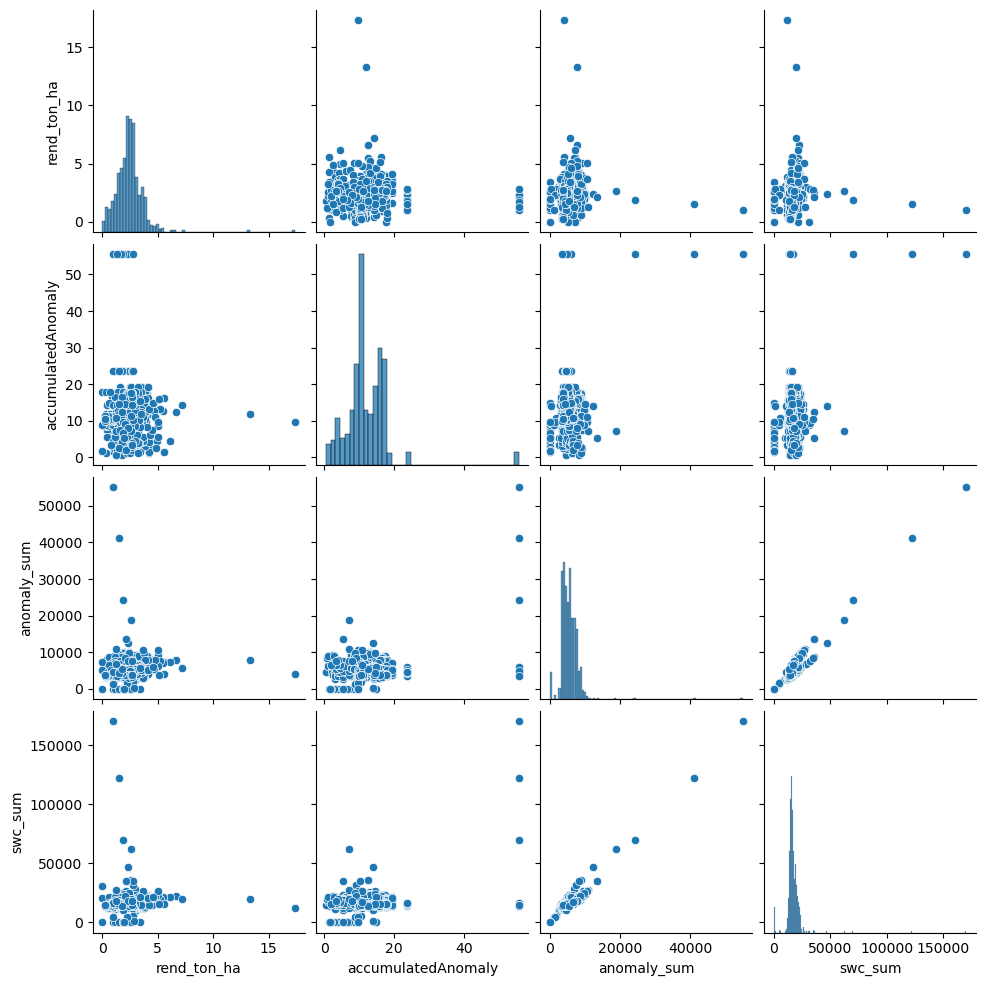

In [11]:
sns.pairplot(df_yields_final[['rend_ton_ha', 'accumulatedAnomaly', 'anomaly_sum', 'swc_sum']])

## CDF Matching function example

In [166]:
x = np.array([5,4,4,3,2,np.nan])
y = np.array([2,1,1,4,np.nan, np.nan])

x_valid = x[~np.isnan(x)]
y_valid = y[~np.isnan(y)]

x_cdf = np.sort(x_valid)
y_cdf = np.sort(y_valid)

x_indices = np.searchsorted(x_cdf, x, side="right")
y_quantiles = x_indices / len(x_cdf)  # Quantiles of x in the valid x range
y_indices = np.floor(y_quantiles * (len(y_cdf)-0)).astype(
    int
)  # Corresponding indices in y

adjusted_x = np.take(y_cdf, y_indices, mode="clip")

In [167]:
adjusted_x

array([4., 4., 4., 1., 1., 4.])

In [168]:
y_indices

array([4, 3, 3, 1, 0, 4])

In [169]:
y_cdf

array([1., 1., 2., 4.])

In [170]:
y_quantiles

array([1. , 0.8, 0.8, 0.4, 0.2, 1. ])

# Toy data for xarray

In [103]:
ds_toy = xr.Dataset(
    data_vars = dict(
        temp = (['lon', 'lat','time'], np.ones((5,5,2))),
    ),
    coords = dict(
        lon = np.arange(1,6),
        lat = np.arange(1,6),
        time = np.arange(1,3)
    )
)
ds_toy

<xarray.Dataset> Size: 496B
Dimensions:  (lon: 5, lat: 5, time: 2)
Coordinates:
  * lon      (lon) int64 40B 1 2 3 4 5
  * lat      (lat) int64 40B 1 2 3 4 5
  * time     (time) int64 16B 1 2
Data variables:
    temp     (lon, lat, time) float64 400B 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0

In [104]:
ds_toy2 = ds_toy.coarsen({'lon':3, 'lat': 3}, boundary='pad').sum()

ds_toy2.to_dataframe().reset_index()

,lon,lat,time,temp
0,2.0,2.0,1,9.0
1,2.0,2.0,2,9.0
2,2.0,4.5,1,6.0
3,2.0,4.5,2,6.0
4,4.5,2.0,1,6.0
5,4.5,2.0,2,6.0
6,4.5,4.5,1,4.0
7,4.5,4.5,2,4.0


In [45]:
ds_toy.coarsen(lon=len(ds_toy.lon)-len(ds_toy.lon)//2, lat=len(ds_toy.lat)-len(ds_toy.lat)//2, boundary = 'trim').sum()

<xarray.Dataset> Size: 112B
Dimensions:  (lon: 2, lat: 2, time: 2)
Coordinates:
  * lon      (lon) float64 16B 1.5 3.5
  * lat      (lat) float64 16B 1.5 3.5
  * time     (time) int64 16B 1 2
Data variables:
    temp     (lon, lat, time) float64 64B 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0

In [32]:
def coarse_grain()

<DatasetGroupBy, grouped over 1 grouper(s), 2 groups in total:
    'lat_bins': 2/2 groups present with labels (0.997,, 2.5], (2.5,, 4.0]>

## Example to get data from API

In [ ]:
API_URL = "https://api.suyana.io/drought-bolivia/time-series"
API_KEY = "93a52c7a17676ed586c058e9f5315c9d66b256affd6d955897c7653d71d7fc08"
headers = {
    "Authorization": f"Bearer {API_KEY}"
}

In [88]:
params = {
    "area": 67,  # Climatic area identifier
    "format": "json"  # Output format (optional, default is csv)
}
response = requests.get(API_URL, headers=headers, params=params)
df = pd.json_normalize(response.json())
#df["Time"] = pd.to_datetime(df["Time"])

In [ ]:
df_full = pd.DataFrame()
for id in list_ids:
    try:
        print(id)
        params = {
            "area": id,  # Climatic area identifier
            "format": "json"  # Output format (optional, default is csv)
        }
        response = requests.get(API_URL, headers=headers, params=params)
        df = pd.json_normalize(response.json())
        df["Time"] = pd.to_datetime(df["Time"])
        df["id_lot"] = id

        df_full = pd.concat([df_full, df], axis=0)
    
    except:
        print(f'Wrong id: {id}')

In [89]:
df.columns

Index(['available_areas', 'error', 'message'], dtype='object')

In [95]:
for el in df.available_areas[0]:
    print(el)

104
105
106
107
120
121
122
124
125
126
127
128
129
158
162
163
164
165
166
167
168
169
170
171
172
173
189
190
191
192
194
195
196
198
199
202
207
208
209
210
211
214
215
218
220
237
43
45
49
50
51
52
53
54
55
56
57
70
72
77
78
79
80
81
82
83
84
85
86
87
